In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
datos_finales = pd.read_csv("dataset_limpio.csv")
datos_finales

,UNNAMED: 0_X,AGE,GRUPO_EDAD,JOB,MARITAL,EDUCATION,DEFAULT,HOUSING,LOAN,CONTACT,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,EMP.VAR.RATE,CONS.PRICE.IDX,CONS.CONF.IDX,NR.EMPLOYED,Y,DATE,LATITUDE,LONGITUDE,ID,UNNAMED: 0_Y,INCOME,KIDHOME,TEENHOME,DT_CUSTOMER,NUMWEBVISITSMONTH,TOTAL_KIDS,CUSTOMER_SENIORITY
0,1,57.0,51-65,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2016-09-14,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,2,4018
1,2,37.0,36-50,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2019-02-15,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,2,4350
2,3,40.0,36-50,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-11-29,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,3,4027
3,4,56.0,51-65,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2017-01-29,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,3,4211
4,5,45.0,36-50,services,MARRIED,basic.9y,NaN,0.0,0.0,telephone,198,1,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2015-09-26,24.689,-101.643,d63ede72-0b6d-45b1-8872-385ac6897f65,5,143854,0,1,2012-01-24,26,1,4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37434,28721,36.0,36-50,blue-collar,MARRIED,UNKNOWN,0.0,1.0,1.0,cellular,90,1,999,1,FAILURE,-1.8,93.075,-47.1,5099.1,no,2016-08-05,49.310,-93.780,649cf395-b67a-416c-b9ae-3eaf6d3661c5,14077,129333,0,2,2014-04-10,15,2,3552
37435,37852,26.0,26-35,student,SINGLE,high.school,0.0,0.0,0.0,cellular,133,1,999,0,NONEXISTENT,-2.9,92.201,-31.4,5076.2,no,2016-06-01,29.871,-86.270,12d4e85c-39d9-4193-a27d-a58e7af15a43,14078,169378,1,2,2014-12-31,30,3,3287
37436,1120,34.0,26-35,blue-collar,SINGLE,basic.9y,0.0,0.0,0.0,telephone,159,3,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-04,36.430,-95.459,0490dbb9-e21d-4b59-a402-93756e8f17da,14080,159144,1,0,2014-10-14,1,1,3365
37437,3797,30.0,26-35,admin.,MARRIED,university.degree,0.0,1.0,0.0,telephone,355,2,999,0,NONEXISTENT,1.1,93.994,-36.4,5191.0,no,2018-04-10,36.468,-74.361,d9f2c31c-7623-44df-9240-b4514bf21abd,14081,51496,0,0,2014-09-18,12,0,3391


In [6]:
def contar_y(df, columna):
    # Calcular cuartiles únicos
    cuartiles = df[columna].quantile([0, 0.25, 0.5, 0.75, 1.0]).drop_duplicates().values

    # Crear etiquetas descriptivas + valores numéricos
    base_labels = ['Muy bajo', 'Bajo', 'Alto', 'Muy alto'][:len(cuartiles)-1]
    etiquetas = [
        f"{base} (de {cuartiles[i]:.2f} a {cuartiles[i+1]:.2f})"
        for i, base in enumerate(base_labels)
    ]

    # Crear columna de rangos
    nombre_rango = f'{columna}_RANGO'
    df[nombre_rango] = pd.cut(df[columna], bins=cuartiles, labels=etiquetas, include_lowest=True)

    # Calcular conteos
    conteo = df.groupby(nombre_rango, observed=True)['Y'].value_counts().unstack().fillna(0).astype(int)

    # Calcular porcentajes de 'yes' y 'no'
    conteo['% NO'] = (conteo['no'] / (conteo['yes'] + conteo['no']) * 100).round(2)
    conteo['% YES'] = 100 - conteo['% NO']

    return nombre_rango, conteo.reset_index()


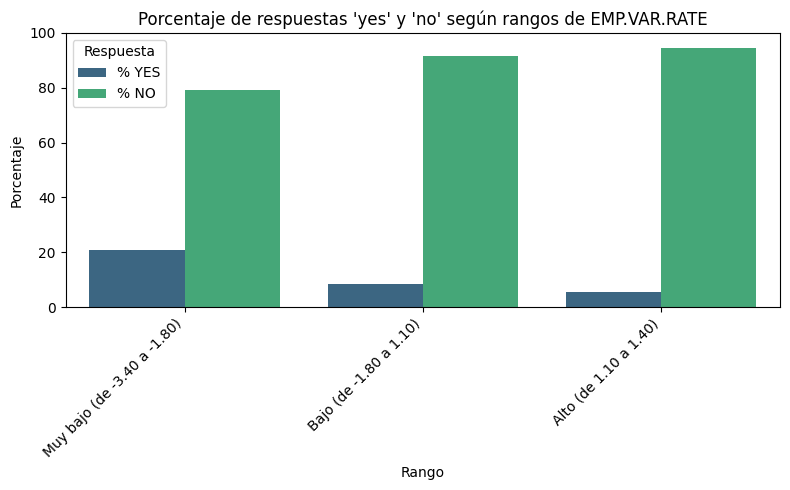


 Conteo y porcentaje de 'yes' y 'no' por rangos de EMP.VAR.RATE:

Y           EMP.VAR.RATE_RANGO     no   yes   % NO  % YES
0  Muy bajo (de -3.40 a -1.80)   8545  2254  79.13  20.87
1       Bajo (de -1.80 a 1.10)  10667  1004  91.40   8.60
2        Alto (de 1.10 a 1.40)  14164   805  94.62   5.38


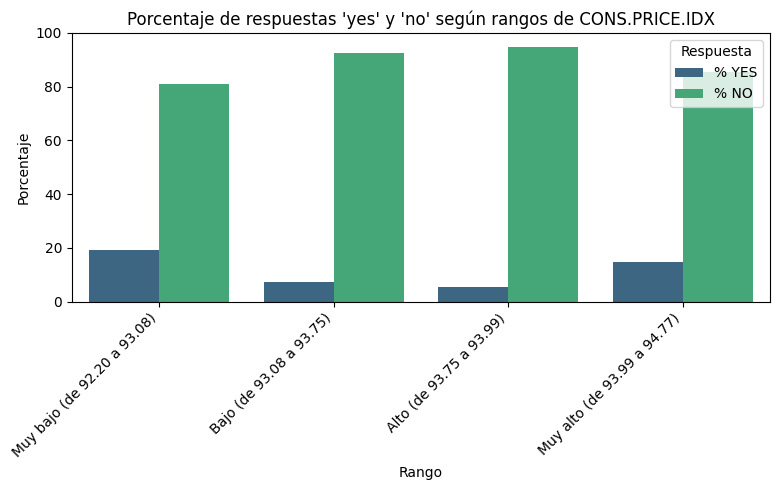


 Conteo y porcentaje de 'yes' y 'no' por rangos de CONS.PRICE.IDX:

Y         CONS.PRICE.IDX_RANGO     no   yes   % NO  % YES
0  Muy bajo (de 92.20 a 93.08)   8226  1933  80.97  19.03
1      Bajo (de 93.08 a 93.75)   8119   651  92.58   7.42
2      Alto (de 93.75 a 93.99)  12593   722  94.58   5.42
3  Muy alto (de 93.99 a 94.77)   4438   757  85.43  14.57


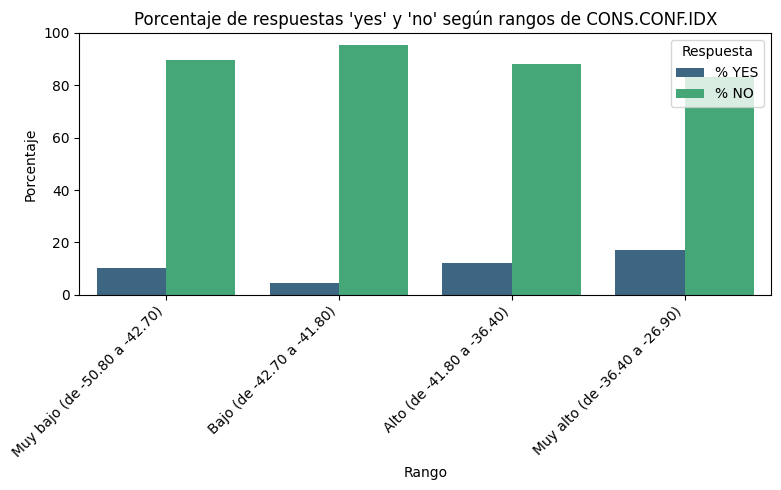


 Conteo y porcentaje de 'yes' y 'no' por rangos de CONS.CONF.IDX:

Y            CONS.CONF.IDX_RANGO     no   yes   % NO  % YES
0  Muy bajo (de -50.80 a -42.70)  12750  1488  89.55  10.45
1      Bajo (de -42.70 a -41.80)   7033   330  95.52   4.48
2      Alto (de -41.80 a -36.40)   7818  1064  88.02  11.98
3  Muy alto (de -36.40 a -26.90)   5775  1181  83.02  16.98


In [ ]:
variables = ['EMP.VAR.RATE', 'CONS.PRICE.IDX', 'CONS.CONF.IDX']
resultados = {col: contar_y(datos_finales, col) for col in variables}

for col, (nombre_rango, tabla) in resultados.items():

    df_plot = tabla[[nombre_rango, '% YES', '% NO']].melt(
        id_vars=nombre_rango,
        value_vars=['% YES', '% NO'],
        var_name='Respuesta',
        value_name='Porcentaje'
    )

    plt.figure(figsize=(8, 5))
    sns.barplot(data=df_plot, x=nombre_rango, y='Porcentaje', hue='Respuesta', palette='viridis')
    plt.title(f"Porcentaje de respuestas 'yes' y 'no' según rangos de {col}")
    plt.ylabel('Porcentaje')
    plt.xlabel('Rango')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Respuesta')
    plt.tight_layout()
    plt.show()

    print(f"\n Conteo y porcentaje de 'yes' y 'no' por rangos de {col}:\n")
    print(tabla)